In [46]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Question 1 - Extracting Tesla Stock Data Using yfinance


In [4]:
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period='max')
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [42]:
url = 'https://finance.yahoo.com/quote/TSLA/history/?period1=1277818200&period2=1717077484'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36'
}
response = requests.get(url, headers=headers)
max_data_size = None
soup = BeautifulSoup(response.text, 'html.parser')
revenue_table = soup.find_all('tr', class_='svelte-ewueuo')
data = []
for i, row in enumerate(revenue_table):
    if i == max_data_size:
        break
    cols = row.find_all('td')
    if len(cols) > 0:
        cols = [col.text for col in cols]
        data.append(cols)
columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df = pd.DataFrame(data, columns=columns)
df.tail()[::-1]


,Date,Open,High,Low,Close,Adj Close,Volume
3505,"Jun 29, 2010",1.27,1.67,1.17,1.59,1.59,"281,494,500"
3504,"Jun 30, 2010",1.72,2.03,1.55,1.59,1.59,"257,806,500"
3503,"Jul 1, 2010",1.67,1.73,1.35,1.46,1.46,"123,282,000"
3502,"Jul 2, 2010",1.53,1.54,1.25,1.28,1.28,"77,097,000"
3501,"Jul 6, 2010",1.33,1.33,1.06,1.07,1.07,"103,003,500"


# Question 3: Use yfinance to Extract Stock Data




In [45]:
gamestop = yf.Ticker('GME')
gamestop_data = gamestop.history(period='max')
gamestop_data.reset_index(inplace=True)
gamestop_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Extracting GameStop Revenue Data Using Webscraping

In [43]:
url = 'https://finance.yahoo.com/quote/GME/history/?period1=1013610600&period2=1717079851'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36'
}
response = requests.get(url, headers=headers)
max_data_size = None
soup = BeautifulSoup(response.text, 'html.parser')
revenue_table = soup.find_all('tr', class_='svelte-ewueuo')
data = []
for i, row in enumerate(revenue_table):
    if i == max_data_size:
        break
    cols = row.find_all('td')
    if len(cols) > 0:
        cols = [col.text for col in cols]
        data.append(cols)
columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df = pd.DataFrame(data, columns=columns)
df.tail()[::-1]


,Date,Open,High,Low,Close,Adj Close,Volume
5642,"Feb 13, 2002",2.41,2.52,2.38,2.51,1.69,"76,216,000"
5641,"Feb 14, 2002",2.54,2.55,2.48,2.50,1.68,"11,021,600"
5640,"Feb 15, 2002",2.50,2.51,2.46,2.49,1.67,"8,389,600"
5639,"Feb 19, 2002",2.47,2.47,2.34,2.39,1.61,"7,410,400"
5638,"Feb 20, 2002",2.40,2.47,2.38,2.47,1.66,"6,892,800"


# Question 5: Plot Tesla Stock Graph



In [49]:
def make_graph(data, title):
    plt.plot(data["Date"], data['Close'])
    plt.title(title)
    plt.show()

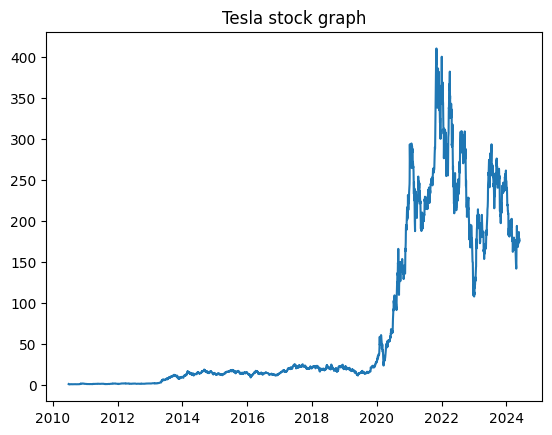

In [51]:
make_graph(tesla_data, "Tesla stock graph")

# Question 6: Plot GameStop Stock Graph

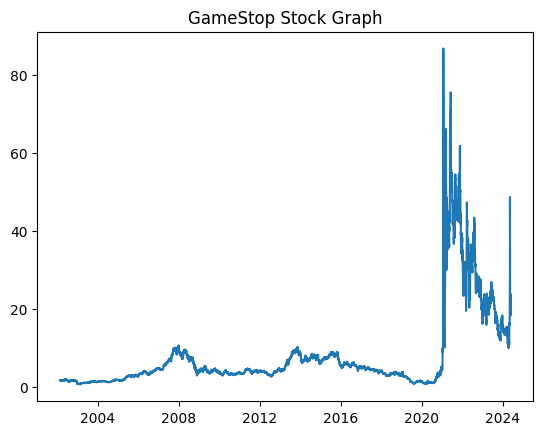

In [52]:
make_graph(gamestop_data, "GameStop Stock Graph")